In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from tqdm import tqdm

In [5]:

model = tf.keras.models.load_model('saved_model\my_model')

In [6]:
DATADIR = r"F:\Projects\learn\deep learning\convnet\Aug_20"
CATEGORIES = [str(i) for i in os.listdir(DATADIR)]
prediction_dict = dict(zip([i for i, j in enumerate(CATEGORIES)],CATEGORIES))

CATEGORIES
                   

['AMERICAN GOLDFINCH',
 'BLACK-CAPPED CHICKADEE',
 'CALIFORNIA GULL',
 'CHIPPING SPARROW',
 'CROW',
 'DARK EYED JUNCO',
 'DOWNY WOODPECKER',
 'EASTERN BLUEBIRD',
 'GOLDEN EAGLE',
 'HOUSE FINCH',
 'HOUSE SPARROW',
 'MOURNING DOVE',
 'NORTHERN CARDINAL',
 'NORTHERN MOCKINGBIRD',
 'RED HEADED WOODPECKER',
 'ROBIN',
 'ROCK DOVE',
 'RUBY THROATED HUMMINGBIRD',
 'TIT MOUSE',
 'WOOD DUCK']

In [8]:
def decode_prediction(arr):
    out = []
    for i in arr:
        new = sorted(list(i))[-3:]
        for j in new:
            out.append(prediction_dict[list(i).index(j)])
    print("Top 3 Predictions")
    return out[::-1]
        

73728/65862 [=================================] - 0s 1us/step


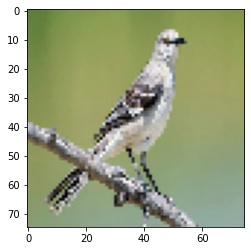

In [9]:
URL = 'https://www.pennington.com/-/media/Images/Pennington2-NA/US/blog/Wild-Bird/Northern-Mockingbirds/Northern-Mockingbird-og.jpg'
img_path = tf.keras.utils.get_file('bird.jpg', URL)


img_array = cv2.imread(img_path)
IMG_SIZE = 75
img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
img_array = np.array(img_array)

plt.imshow(img_array)


x = img_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

os.remove(img_path)


In [10]:

prediction = model.predict(x)
decode_prediction(prediction)

Top 3 Predictions


['NORTHERN MOCKINGBIRD', 'DOWNY WOODPECKER', 'CHIPPING SPARROW']

INFO:tensorflow:Assets written to: saved_model/my_model.hd5\assets
